### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [137]:
data = pd.read_csv('data/coupons.csv')

In [138]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [139]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [140]:
data.duplicated().sum()

74

3. Decide what to do about your missing data -- drop, replace, other...

In [141]:
# this dataframe have 12684 rows while cars has 12576 nan value
# none of the value is important so decide to drop them 
data[~data["car"].isna()]["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [142]:
data.drop(columns = ["car"], inplace = True)

In [143]:
# the rest na is smaller than 2% of the dataset, drop the nan
data.dropna(inplace = True)

In [144]:
# check the duplicates
data.duplicated().sum()

72

In [145]:
# drop duplicates
data.drop_duplicates(inplace = True)

4. What proportion of the total observations chose to accept the coupon? 



In [146]:
temp = data["Y"].value_counts()
display(temp)
total_observations = temp[1] / data["Y"].size 
print(f"The proportion of total observations"
      f"chose to accept the coupon is:\n"
      f"{total_observations:.2%}")

1    6825
0    5182
Name: Y, dtype: int64

The proportion of total observationschose to accept the coupon is:
56.84%


5. Use a bar plot to visualize the `coupon` column.

never    4916
less1    3351
1~3      2365
4~8      1049
gt8       326
Name: Bar, dtype: int64

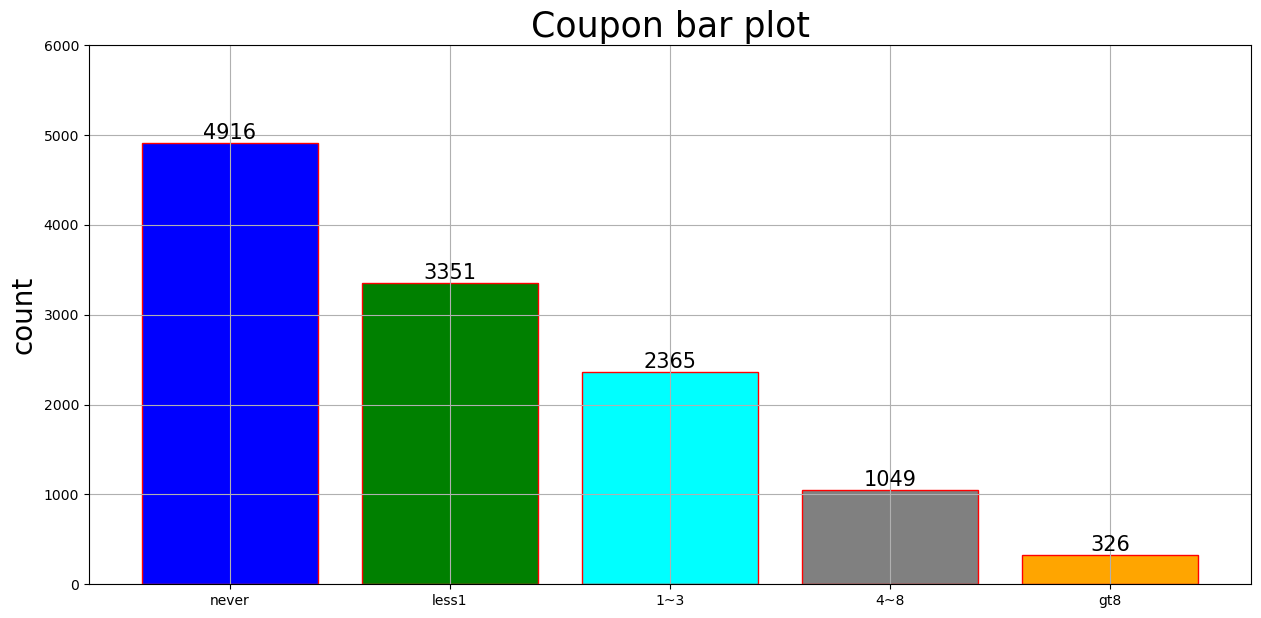

In [147]:
display(data["Bar"].value_counts())
x = data["Bar"].value_counts().index
y = data["Bar"].value_counts().values
color = ["blue","green","cyan","grey","orange"]
plt.figure(figsize = (15,7))
container = plt.bar(x, y, color = color, edgecolor = "red")
plt.grid()
plt.ylim(0,6000)
plt.title("Coupon bar plot", fontsize = 25)
plt.ylabel("count", fontsize = 20)
plt.bar_label(container, fontsize = 15)
plt.show()

6. Use a histogram to visualize the temperature column.

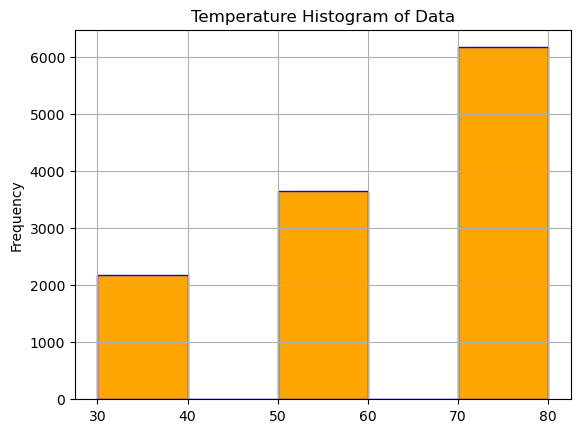

In [148]:
data["temperature"].plot(kind = "hist", bins= 5, color = "orange",
                        edgecolor = "blue", grid = True, xlabel = "Temperature",
                        title = "Temperature Histogram of Data")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [149]:
bar_df = data[data["coupon"] == "Bar"].reset_index(drop = True)

In [150]:
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
2,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [151]:
temp1 = bar_df["Y"].value_counts()
display(temp1)
total_observations = temp1[1] / bar_df["Y"].size 
print(f"The proportion of bar coupon who "
      f"chose to accept the coupon is:\n"
      f"{total_observations:.2%}")

0    1121
1     785
Name: Y, dtype: int64

The proportion of bar coupon who chose to accept the coupon is:
41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [152]:
def get_acceptance_rate(freq_list, customer_type):
    """
    freq_list is a list stores how often a customer visit the bar
    customer_type is a string display the customer type
    """
    temp_df = bar_df[bar_df["Bar"].isin(freq_list)]
    accept = temp_df[temp_df["Y"] == 1].index.size
    result = accept / temp_df.index.size
    print("For", customer_type, "acceptance rate is\n", f"{result:.3%}")

In [153]:
get_acceptance_rate(["never", "less1", "1~3"], 
                    "customer who went to a bar 3 or fewer times")

For customer who went to a bar 3 or fewer times acceptance rate is
 37.245%


In [154]:
get_acceptance_rate(["4~8", "gt8"],
                    "customer who went to a bar more than 3 times")

For customer who went to a bar more than 3 times acceptance rate is
 76.166%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [155]:
bar_df["Bar"].value_counts()

never    788
less1    546
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [156]:
bar_df["age"] = bar_df["age"].map({"21":21, "26":26, "31":31, "50plus": 51,
                                   "36":36, "41":41, "46":46, "below21":20})

In [157]:
def get_acceptance_rate_over25(freq_list, customer_type):
    """
    freq_list is a list stores how often a customer visit the bar
    customer_type is a string display the customer type
    """
    temp_df = bar_df[(bar_df["Bar"].isin(freq_list)) & (bar_df["age"] > 25)]
    #display(temp_df[["Bar", "age", "Y"]].value_counts("Y"))
    accept = temp_df[temp_df["Y"] == 1].index.size
    result = accept / temp_df.index.size
    print("For", customer_type, "acceptance rate is\n", f"{result:.3%}")

In [158]:
get_acceptance_rate_over25(["1~3","4~8","gt8"],"User above 25 and visit bar more than once a month")

For User above 25 and visit bar more than once a month acceptance rate is
 68.983%


In [159]:
get_acceptance_rate(["never", "less1","1~3", "4~8", "gt8"],
                    "All User go to the bar")

For All User go to the bar acceptance rate is
 41.186%


**There is a difference because the overall user who go to the bar, their acceptance of coupon is 41.186% while for the user over 25 their acceptance is 68.983%**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [160]:
def get_acceptance_rate_passengers(freq_list, customer_type):
    """
    freq_list is a list stores how often a customer visit the bar
    customer_type is a string display the customer type
    """
    temp_df = bar_df[(bar_df["Bar"].isin(freq_list)) 
                     & (bar_df["occupation"] != "Farming Fishing & Forestry")
                     & (bar_df["passanger"] != "Kid(s)")]
    #display(temp_df[["Bar", "occupation", "passanger", "Y"]].index)
    accept = temp_df[temp_df["Y"] == 1].index.size
    result = accept / temp_df.index.size
    print("For", customer_type, "acceptance rate is\n", f"{result:.3%}")

In [161]:
get_acceptance_rate_passengers(["1~3","4~8","gt8"],
                               "Customer who doesn't take kids with them and the occupation is not Farming Fishing or Forestry")

For Customer who doesn't take kids with them and the occupation is not Farming Fishing or Forestry acceptance rate is
 70.943%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [162]:
temp_df1 = bar_df[(bar_df["Bar"].isin(["1~3","4~8","gt8"])) 
                  & (bar_df["passanger"] != "Kid(s)")
                  & (bar_df["maritalStatus"] != "Widowed")]
accept = temp_df1[temp_df1["Y"] == 1].index.size
result = accept / temp_df1.index.size
print("For customer go to bar more than once, do not bring kids,"
      " and not widowed acceptance rate is:\n", 
      f"{result:.3%}")

For customer go to bar more than once, do not bring kids, and not widowed acceptance rate is:
 70.943%


In [163]:
temp_df2 = bar_df[(bar_df["Bar"].isin(["1~3","4~8","gt8"])) 
                  & (bar_df["age"] < 30)]
accept = temp_df2[temp_df2["Y"] == 1].index.size
result = accept / temp_df2.index.size
print("For customer go to bar more than once, under age 30,"
      " acceptance rate is:\n", 
      f"{result:.3%}")

For customer go to bar more than once, under age 30, acceptance rate is:
 71.951%


In [164]:
temp_df3 = bar_df[(bar_df["RestaurantLessThan20"].isin(["4~8","gt8"])) 
                  & (bar_df["income"].isin(["$25000 - $37499",
                                            "$12500 - $24999",
                                            "$37500 - $49999",
                                            "Less than $12500"]))]
accept = temp_df3[temp_df3["Y"] == 1].index.size
result = accept / temp_df3.index.size
print("For customer go to cheap restaurants often and income is less than 50K"
      " acceptance rate is:\n", 
      f"{result:.3%}")

For customer go to cheap restaurants often and income is less than 50K acceptance rate is:
 45.646%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

For Driver who accept the bar coupons   
1. customer go to bar more than once in a month
2. customer is over 25 years old 
3. customer doesn't bring kids with them

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**check the other coupon group Coffee House**

In [165]:
coffee_df = data[data["coupon"] == "Coffee House"]

In [166]:
coffee_df.value_counts("Y")

Y
0    1921
1    1888
dtype: int64

In [167]:
# test the overall acceptance rate of Coffee house coupon
coffee_df[coffee_df["Y"] == 1].index.size/ coffee_df.index.size

0.495668154371226

In [168]:
test = coffee_df[(coffee_df["destination"] == "No Urgent Place")
     &(coffee_df["passanger"] == "Friend(s)")
     &(coffee_df["weather"] == "Sunny")
     &(coffee_df["CoffeeHouse"].isin(["1~3","less1","4~8"]))]

In [169]:
result = test[test["Y"] == 1].index.size / test.index.size
print("For customer's destination is not urgent and with friend while its sunny weather,"
      " acceptance rate is:\n", 
      f"{result:.3%}")

For customer's destination is not urgent and with friend while its sunny weather, acceptance rate is:
 69.240%


In [170]:
coffee_plot_df = coffee_df[["destination", "passanger", "weather", "CoffeeHouse", "Y"]]
plot1 = coffee_plot_df.value_counts(["destination", "Y"]).reset_index()
plot2 = coffee_plot_df.value_counts(["passanger", "Y"]).reset_index()
plot3 = coffee_plot_df.value_counts(["weather", "Y"]).reset_index()
plot4 = coffee_plot_df.value_counts(["CoffeeHouse", "Y"]).reset_index()

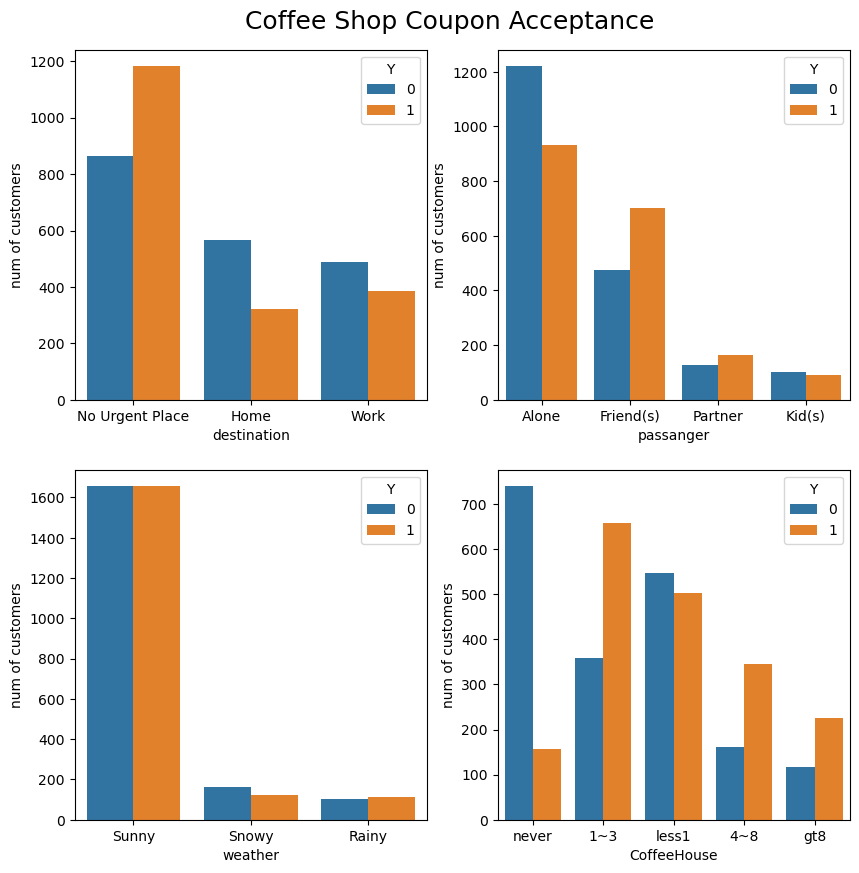

In [171]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
fig.suptitle("Coffee Shop Coupon Acceptance", y = 0.92,fontsize =18)
sns.barplot(x = "destination", y = 0, data = plot1, hue = "Y", ax = axs[0,0])
sns.barplot(x = "passanger", y = 0, data = plot2, hue = "Y", ax = axs[0,1])
sns.barplot(x = "weather", y = 0, data = plot3, hue = "Y", ax = axs[1,0])
sns.barplot(x = "CoffeeHouse", y = 0, data = plot4, hue = "Y", ax = axs[1,1])
axs[0,1].set_ylabel("num of customers")
axs[0,0].set_ylabel("num of customers")
axs[1,0].set_ylabel("num of customers")
axs[1,1].set_ylabel("num of customers")
plt.show()